In [112]:
#import libraries
import polars as pl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

read the dobson data csv file as df

In [113]:
df = pd.read_csv(r"C:\Users\Hp Elitebook\Documents\GIT\DOBSON-DATA\dobson_data.csv")
df 

,DATE,DS,ZC
0,1/2/2015,243.1,NaN
1,1/7/2015,242.1,NaN
2,1/19/2015,246.7,NaN
3,1/27/2015,244.1,NaN
4,1/28/2015,237.3,NaN
...,...,...,...
1220,7/25/2024,273.1,256.8
1221,7/26/2024,257.9,259.2
1222,7/29/2024,260.0,NaN
1223,7/30/2024,NaN,NaN


Filtering out outliers in our dataset

In [116]:
# Filter based on DS and ZC values using OR, and apply the filter in place
df.drop(df[(df['DS'] < 240) | (df['DS'] > 285) | (df['ZC'] < 220) | (df['ZC'] > 260)].index, inplace=True)

C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_23428\3451664300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['DS'] < 240) | (df['DS'] > 285) | (df['ZC'] < 220) | (df['ZC'] > 260)].index, inplace=True)


In [114]:
df.columns = df.columns.str.strip()
# Filter based on DS values
df = df[(df['DS'] >= 240) & (df['DS'] <= 285)]

# Filter based on ZC values (assuming 'ZC' is a valid column in your DataFrame)
df_zc = df[(df["ZC"] >= 220) & (df["ZC"] <= 260)]
df_zc


,DATE,DS,ZC
653,1/23/2020,247.7,254.7
681,3/5/2020,251.7,253.3
690,3/18/2020,257.0,253.8
692,3/20/2020,248.1,256.4
697,3/27/2020,246.3,255.3
...,...,...,...
1211,7/12/2024,258.6,247.0
1212,7/15/2024,258.9,254.6
1217,7/22/2024,266.3,257.9
1220,7/25/2024,273.1,256.8


We did a plot for the daily average DS values for Nairobi station

In [ ]:
df

,DATE,DS,ZC
653,1/23/2020,247.7,254.7
681,3/5/2020,251.7,253.3
690,3/18/2020,257.0,253.8
692,3/20/2020,248.1,256.4
697,3/27/2020,246.3,255.3
...,...,...,...
1211,7/12/2024,258.6,247.0
1212,7/15/2024,258.9,254.6
1217,7/22/2024,266.3,257.9
1220,7/25/2024,273.1,256.8


C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_23428\1295632552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"] = pd.to_datetime(df['DATE'])


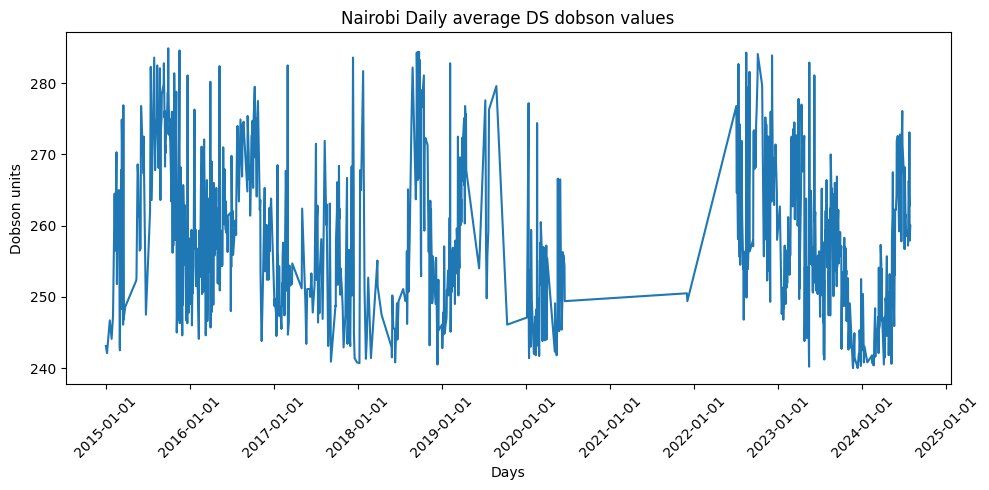

In [117]:


# Clean column names
df.columns = df.columns.str.strip()

# Convert DATE column to datetime
df["DATE"] = pd.to_datetime(df['DATE'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.plot(df['DATE'], df['DS'])

# Set axis labels using ax methods
ax.set_xlabel("Days")
ax.set_ylabel("Dobson units")
ax.set_title("Nairobi Daily average DS dobson values")

# Format date x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()


we resampled out daily data to monthly averages

In [118]:
# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)
# Resample to monthly data (aggregating by the mean)
df_monthly = df.resample('M').mean()
df_monthly

C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_23428\3064214469.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


,DS,ZC
DATE,,
2015-01-31,244.000000,NaN
2015-02-28,259.255556,NaN
2015-03-31,255.668750,NaN
2015-04-30,NaN,NaN
2015-05-31,260.214286,NaN
...,...,...
2024-03-31,249.243750,244.412500
2024-04-30,248.081250,241.623077
2024-05-31,253.745000,247.976923


added a month column on our dataframe

In [119]:
# Create a 'Month' column from the index (month and year)
df_monthly['Month'] = df_monthly.index.strftime('%Y-%m')
df_monthly

,DS,ZC,Month
DATE,,,
2015-01-31,244.000000,NaN,2015-01
2015-02-28,259.255556,NaN,2015-02
2015-03-31,255.668750,NaN,2015-03
2015-04-30,NaN,NaN,2015-04
2015-05-31,260.214286,NaN,2015-05
...,...,...,...
2024-03-31,249.243750,244.412500,2024-03
2024-04-30,248.081250,241.623077,2024-04
2024-05-31,253.745000,247.976923,2024-05


Did a monthly DS plot for Nairobi station

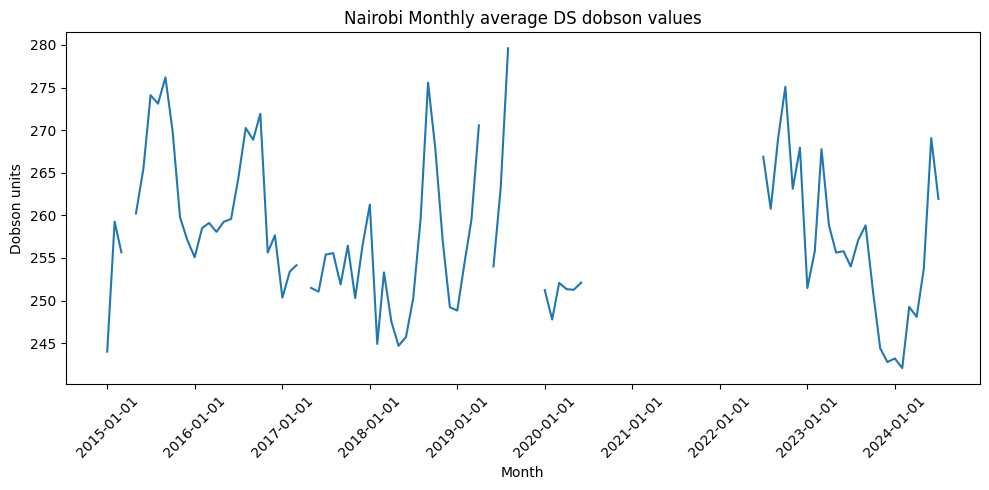

In [120]:


# Clean column names
df_monthly.columns = df_monthly.columns.str.strip()

# Convert DATE column to datetime
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.plot(df_monthly['Month'], df_monthly['DS'])

# Set axis labels using ax methods
ax.set_xlabel("Month")
ax.set_ylabel("Dobson units")
ax.set_title("Nairobi Monthly average DS dobson values")

# Format date x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()


Did plot daily ZC values for Nairobi station

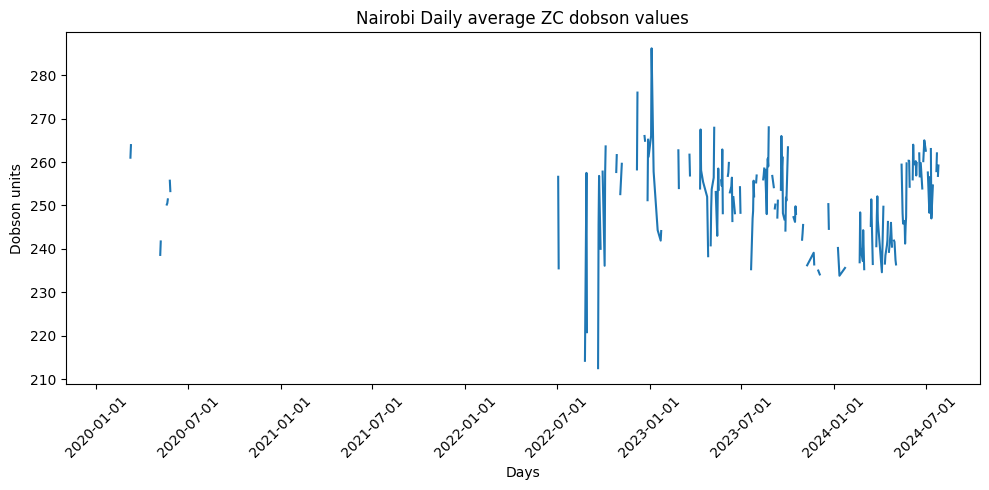

In [ ]:



# Clean column names
df.columns = df_zc.columns.str.strip()

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.plot(df['DATE'], df["ZC"])

# Set axis labels using ax methods
ax.set_xlabel("Days")
ax.set_ylabel("Dobson units")
ax.set_title("Nairobi Daily average ZC dobson values")

# Format date x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()


added the month column on the dataframe

In [111]:
df_monthly

,DS,ZC,Month
DATE,,,
2015-01-31,244.000000,NaN,2015-01-01
2015-02-28,259.255556,NaN,2015-02-01
2015-03-31,255.668750,NaN,2015-03-01
2015-04-30,NaN,NaN,2015-04-01
2015-05-31,260.214286,NaN,2015-05-01
...,...,...,...
2024-03-31,249.243750,244.412500,2024-03-01
2024-04-30,248.081250,241.623077,2024-04-01
2024-05-31,254.731818,249.620000,2024-05-01


plot monthly ZC values for Nairobi Station

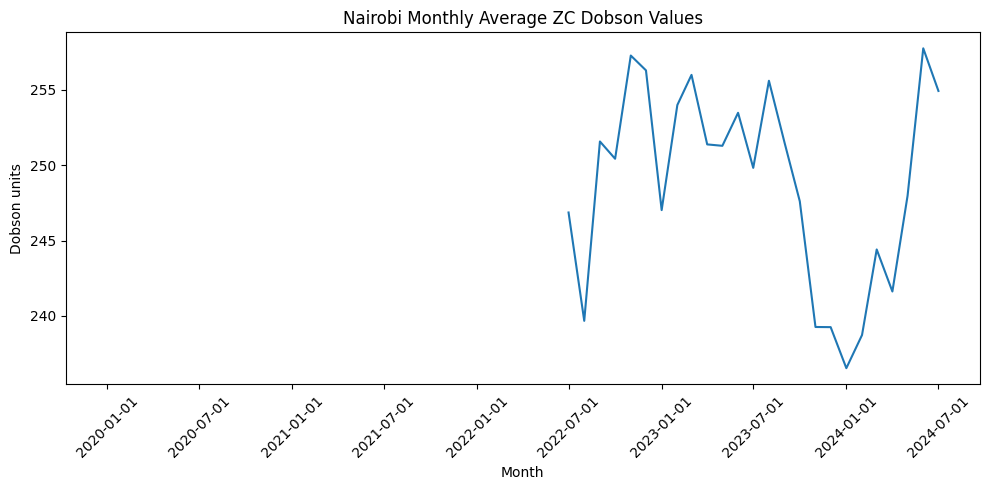

In [122]:
# If you want to extract the month from the 'DATE' column, you can do so:
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.plot(df_monthly['Month'], df_monthly['ZC'])

# Set axis labels using ax methods
ax.set_xlabel("Month")
ax.set_ylabel("Dobson units")
ax.set_title("Nairobi Monthly Average ZC Dobson Values")

# Format date x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate x-axis ticks
plt.setp(ax.get_xticklabels(), rotation=45)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()